In [35]:
# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

Object `correct` not found.


<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
    Yes, the body temperature is normally distributed.
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
    Yes, the sample size is large (>30). The observations are independent.
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [13]:
# Explore the dataset
print(df.shape)

(130, 3)


In [14]:
#The dataset has three columns : temprature, gender and heart_rate
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [15]:
#All three columns have non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [16]:
#Get some stats for temperature and heart_rate
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


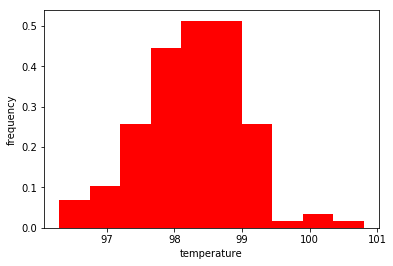

In [27]:
# Draw histogram on temperature, and it is not exact symmetrical bell shape, but very close. 
plt.hist(df['temperature'], bins=10, color='red', normed=1)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.show()

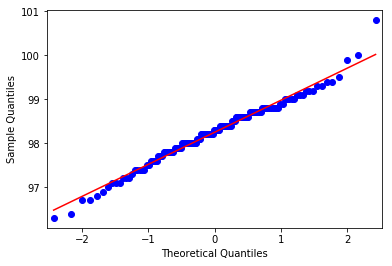

In [36]:
#Draw Quantile-Quantile Plot and most dots are on the line. So body temperature is normally distributed. 
sm.qqplot(df['temperature'], line='s')
plt.show()

In [43]:
#The null hypothesis is the true population mean of body temperature is 98.6 degrees F.
#The alternative hypothesis is the true population mean of body temperature is not 98.6 degress F.
#I will use one sample test since we compare one set of data to a single number
#First, I will try bootstrap hypothesis test
#Make dataset called temp_shift with the mean of 98.6
temp_shift = df['temperature'] - np.mean(df['temperature']) + 98.6
temp_shift.head(5)

0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64

In [60]:
#Use bootstrapping on temp_shift data to simulate data aquisition under the null hypothesis
#Define function bootstrap_replicate_1d draw_bs_reps
def diff_from_mean(data, p_mean=98.6):
    return np.mean(data) - 98.6

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [71]:
#Calculate the observed mean difference
ob_diff = diff_from_mean(df['temperature'])
print(ob_diff)

-0.35076923076924515


In [75]:
#Generate bootstrap replicates
bs_replicates =  draw_bs_reps(temp_shift, diff_from_mean, 10000)

In [78]:
#Calculate the p value, p_value is 0. We need to reject the null hypothesis. The true population mean is not 98.6 Degree F.
p_value = np.sum(bs_replicates <= ob_diff) / len(bs_replicates)
p_value

0

In [87]:
# In this situation, we have large sample size (>30), we can use z statistic
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])
n = len(df['temperature'])
print(n)
print(sample_mean)
print(sample_std)

130
98.24923076923075
0.730357778905038


In [89]:
# Calculate z statistic
z_score = (sample_mean - 98.6)/(sample_std/ np.sqrt(n))
z_score

-5.4759252020785585

In [ ]:
#Look up the z table, and find the z score is out of range. We need to reject the null hypothesis